In [3]:
import torch
import matplotlib.pyplot as plt

In [112]:
def repdiag(x, lu, ld):
    s = list(x.shape)
    # Upper pad
    if lu > 0:
        s[-2] = ld
        x = torch.cat([torch.zeros(*s, device=x.device, dtype=x.dtype), x], dim=-2)
    # Lower pad
    if ld > 0:
        s[-2] = lu
        x = torch.cat([x, torch.zeros(*s, device=x.device, dtype=x.dtype)], dim=-2)
    return torch.diagonal(x.unfold(-2, lu +ld +1, 1), 0, -2, -1)

In [93]:
def banddiag(x, lu, ld, fill=0):
    s = list(x.shape)
    # Upper pad
    if lu > 0:
        s[-2] = lu
        x = torch.cat([torch.zeros(*s, device=x.device, dtype=x.dtype), x], dim=-2)
    # Lower pad
    if ld > 0:
        s[-2] = ld
        x = torch.cat([x, torch.zeros(*s, device=x.device, dtype=x.dtype)], dim=-2)
    
    return torch.diagonal(x.unfold(-2, lu + ld+1, 1), 0, -3, -2).transpose(-2, -1)

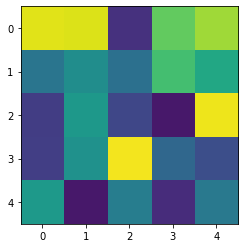

In [79]:
n = torch.rand(5, 5)
plt.imshow(n, vmin=0, vmax=1)

In [51]:
torch.diagonal(n.unfold(-2, 2, 1), 0, -2, -1)

tensor([[0.2563, 0.8114],
        [0.5357, 0.2603],
        [0.9647, 0.2025],
        [0.3221, 0.4271]])

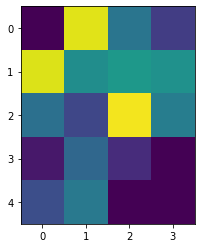

In [110]:
y = multidiag(n, 1, 2)
plt.imshow(y, vmin=0, vmax=1)

In [92]:
y2.shape

torch.Size([3, 3])

In [104]:
y2

tensor([[0.0000, 0.9542, 0.9492],
        [0.3893, 0.4890, 0.3701],
        [0.5341, 0.2129, 0.0637],
        [0.9806, 0.3355, 0.2405],
        [0.1258, 0.4051, 0.0000]])

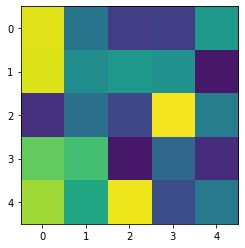

In [107]:
plt.imshow(n.transpose(0, 1), vmin=0, vmax=1)

torch.Size([5, 4])


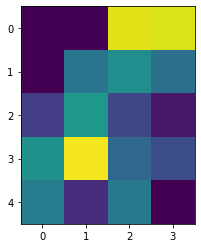

In [113]:
y2 = repdiag(y.flip(-1), 1, 2)
print(y2.shape)
plt.imshow(y2, vmin=0, vmax=1)

In [126]:
m = torch.zeros(5, 5)
banddiag(m, 1, 1)[:] = torch.ones(5, 1)

In [127]:
m

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])